## Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [ ]:
df=data[0]

## Visualize Data

In [ ]:
data[1]

In [ ]:
plt.scatter(df[:,0],df[:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(df)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df[:,0],df[:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(df[:,0],df[:,1],c=data[1],cmap='rainbow')

# Clustering with Mall Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [3]:
X= df.iloc[:, [1,2]].values

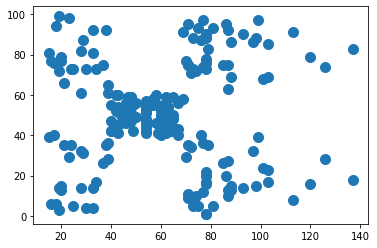

In [5]:
plt.scatter(X[:, 0], X[:, 1], s = 100)

In [6]:
from sklearn.cluster import KMeans
wcss=[]
KMeans()
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

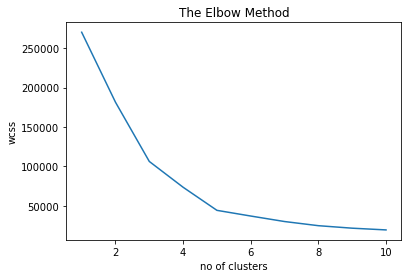

In [7]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

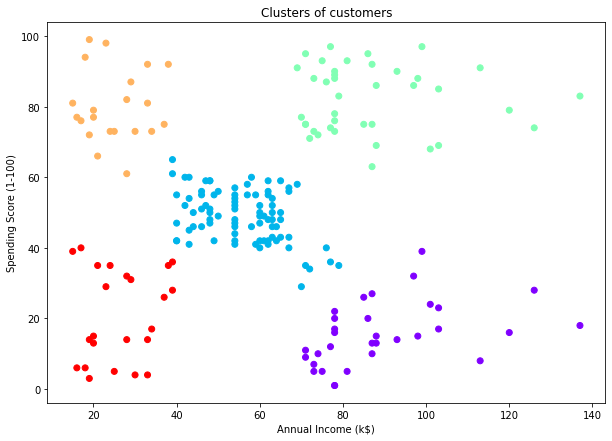

In [17]:
#Visualizing all the clusters 
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=h_cluster.labels_, cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Hierarchical Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [11]:
# setting distance_threshold=0 ensures we compute the full tree.
h_cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
h_cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

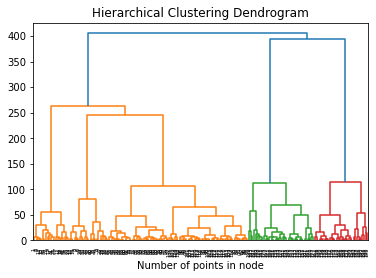

In [13]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(h_cluster, truncate_mode='level', p=10)
plt.xlabel("Number of points in node")
plt.show()

In [14]:
h_cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
h_cluster.fit(X)

AgglomerativeClustering(n_clusters=5)

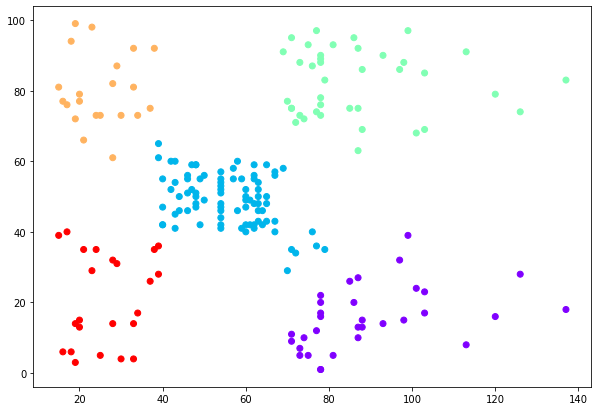

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=h_cluster.labels_, cmap='rainbow')